In [43]:
# 1. Objective : Data loading and Data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
df = pd.read_csv(r"D:\Oasis\Level 1 - Project 1 - EDA\retail_sales_dataset.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [46]:
df.isnull().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [47]:
df = df.drop(['Transaction ID', 'Customer ID'], axis=1)

In [48]:
# Adding an additional column called Month
df['Date'] = pd.to_datetime(df['Date'])  
df['Month_numbers'] = df['Date'].dt.month
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['Month'] = df['Month_numbers'].map(month_names)

In [49]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month_numbers,Month
0,2023-11-24,Male,34,Beauty,3,50,150,11,November
1,2023-02-27,Female,26,Clothing,2,500,1000,2,February
2,2023-01-13,Male,50,Electronics,1,30,30,1,January
3,2023-05-21,Male,37,Clothing,1,500,500,5,May
4,2023-05-06,Male,30,Beauty,2,50,100,5,May


In [50]:
df.tail()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month_numbers,Month
995,2023-05-16,Male,62,Clothing,1,50,50,5,May
996,2023-11-17,Male,52,Beauty,3,30,90,11,November
997,2023-10-29,Female,23,Beauty,4,25,100,10,October
998,2023-12-05,Female,36,Electronics,3,50,150,12,December
999,2023-04-12,Male,47,Electronics,4,30,120,4,April


In [51]:
df["Product Category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [52]:
# 2. Objective : Basic statistics (Mean, Median, Mode and Standard Deviation)
df.describe()

,Date,Age,Quantity,Price per Unit,Total Amount,Month_numbers
count,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,6.549000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,4.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,6.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,10.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,12.000000
std,NaN,13.68143,1.132734,189.681356,559.997632,3.452755


In [53]:
print("Average value of each column:\n", df[['Age', 'Quantity', 'Total Amount']].mean())
print()
print("Median value of each column:\n", df[['Age', 'Quantity', 'Total Amount']].median())
print()
print("The mode values are:\n", df[['Age', 'Quantity', 'Total Amount']].mode())
print()
print("Standard Deviation of each column:\n", df[['Age', 'Quantity', 'Total Amount']].std())

Average value of each column:
 Age              41.392
Quantity          2.514
Total Amount    456.000
dtype: float64

Median value of each column:
 Age              42.0
Quantity          3.0
Total Amount    135.0
dtype: float64

The mode values are:
    Age  Quantity  Total Amount
0   43       4.0          50.0
1   64       NaN           NaN

Standard Deviation of each column:
 Age              13.681430
Quantity          1.132734
Total Amount    559.997632
dtype: float64


<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Date'>

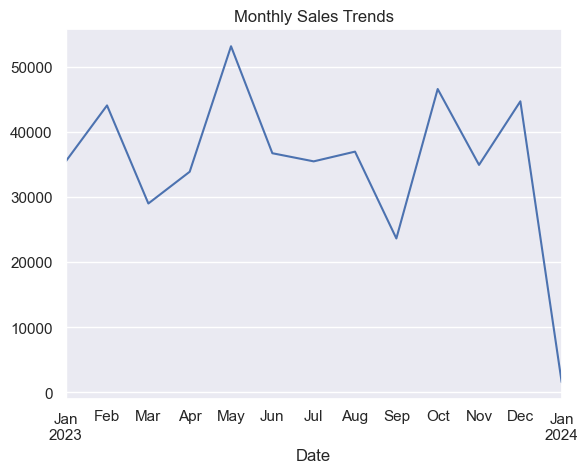

In [54]:
# 3. Objective : Time series analysis
df.set_index('Date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()
monthly_sales.plot(title='Monthly Sales Trends')


In [55]:
# 4. Customer demographics
gender_sales = df.groupby(['Gender'])['Total Amount'].sum()
category_sales = df.groupby(['Product Category'])['Quantity'].sum()
age_sales = df.groupby(['Age'])['Total Amount'].mean()

In [56]:
print(gender_sales)
print()
print(category_sales)
print()

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64



In [57]:
# 5. Visualization - Bar charts, Line plots and heatmaps for correlation

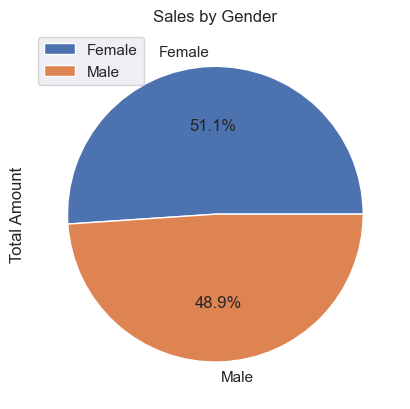

In [58]:
gender_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Gender')
plt.legend()
plt.show()


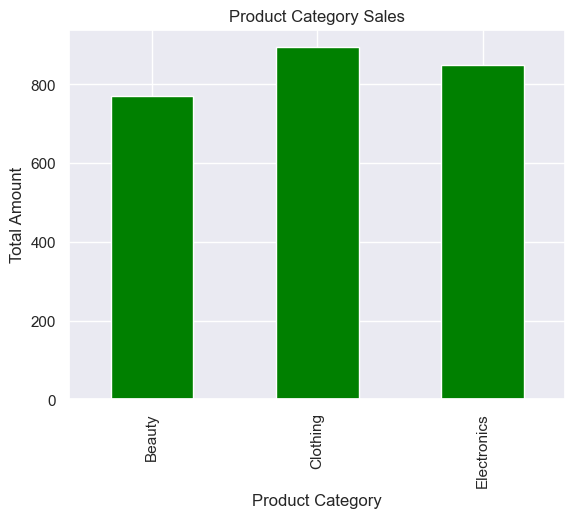

In [59]:
category_sales.plot(kind= 'bar', color= 'green')
plt.title('Product Category Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()


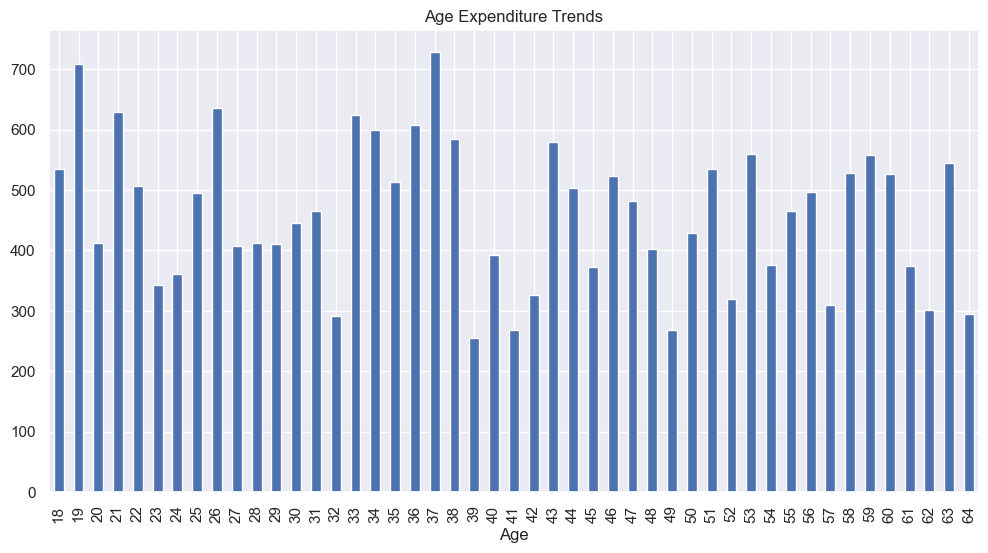

In [60]:
plt.figure(figsize=(12,6))
age_sales.plot(kind= 'bar')
plt.title('Age Expenditure Trends')

plt.show()


Text(47.25, 0.5, 'Months')

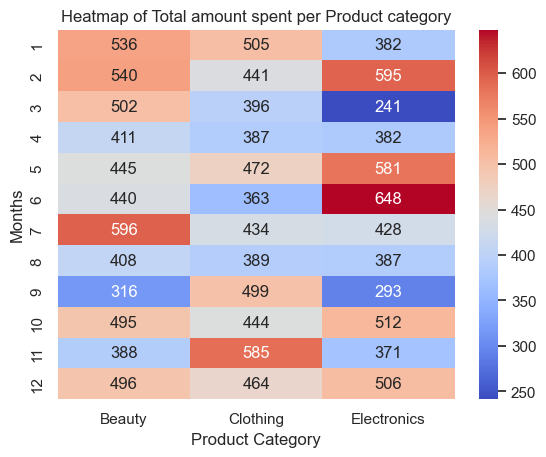

In [61]:
pivot_table = df.pivot_table(index='Month_numbers', columns='Product Category', values='Total Amount')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Heatmap of Total amount spent per Product category')
plt.xlabel('Product Category')
plt.ylabel('Months')
# plt.show()

In [62]:
pivot_table

Product Category,Beauty,Clothing,Electronics
Month_numbers,,,
1,535.769231,504.807692,381.730769
2,539.807692,441.212121,594.807692
3,502.142857,396.447368,241.428571
4,410.517241,387.222222,382.142857
5,444.642857,471.756757,581.125000
6,439.800000,363.214286,647.916667
7,595.925926,434.210526,427.884615
8,407.916667,389.218750,387.236842
9,316.000000,498.750000,293.000000


In [63]:
# Conclusion
text1 = """
Insights on data stats:
- The average customer age is 41.39, indicating a clientele that is possibly settled and financially 
  stable.
- An average quantity of 2.51 suggests most purchases are small, perhaps impulse buys or necessities.
- The high average total amount of 456.00 could imply that while the quantity is small, the items are 
  high-value.
- The median age of 42 and quantity of 3 align closely with the averages, reinforcing the typical
  customer profile.
- However, the median total amount of 135.00 is much lower than the average, hinting at a few large 
  purchases skewing the average.
- The most common age is 43, and the most frequent quantity purchased is 4, suggesting a specific 
  customer segment regularly buys more.
- The mode for the total amount is 50.00, which could be a popular price point or a common sale item 
  value.
- The standard deviation in age is 13.68, showing a diverse range of ages among customers.
- A low standard deviation in quantity (1.13) means most customers' purchase quantities are consistent.
- A large standard deviation in total amount (559.99) indicates spending varies widely, which could be 
  due to diverse product prices or customer purchasing power.

Insights on Product categories

Beauty: Starts strong in January, dips slightly in February, and then has a significant drop in April. 
It peaks in July before falling to the lowest point in September, and then rises again towards the end 
of the year.

Clothing: Shows a gradual decrease from January to June, then a slight increase in July, followed by a 
stable period, and peaks in November.

Electronics: Begins with a lower value in January, peaks significantly in February, drops to the lowest 
point in March, and then fluctuates throughout the year with another peak in June
"""

# Print the insights
print(text1)


Insights on data stats:
- The average customer age is 41.39, indicating a clientele that is possibly settled and financially 
  stable.
- An average quantity of 2.51 suggests most purchases are small, perhaps impulse buys or necessities.
- The high average total amount of 456.00 could imply that while the quantity is small, the items are 
  high-value.
- The median age of 42 and quantity of 3 align closely with the averages, reinforcing the typical
  customer profile.
- However, the median total amount of 135.00 is much lower than the average, hinting at a few large 
  purchases skewing the average.
- The most common age is 43, and the most frequent quantity purchased is 4, suggesting a specific 
  customer segment regularly buys more.
- The mode for the total amount is 50.00, which could be a popular price point or a common sale item 
  value.
- The standard deviation in age is 13.68, showing a diverse range of ages among customers.
- A low standard deviation in quantity (1.13) means